 Пример уменьшения размерности

Рассмотрим основные моменты уменьшения размерности на примере из лекции (рукописные цифры). 

Подключим требуемые библиотеки.

In [103]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет.

In [104]:
X = datasets.load_digits().data #Объекты
y = datasets.load_digits().target #Отклики

Посмотрим, что из себя представляет, например, нулевой объект датасета.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


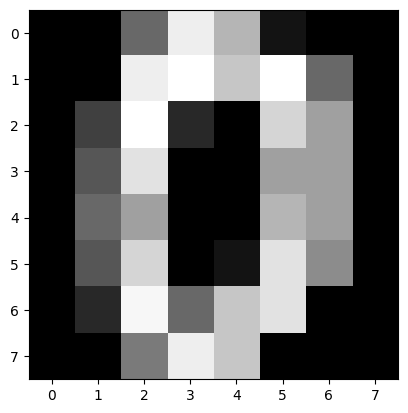

In [105]:
print(X[0])
plt.imshow(X[0].reshape([8,8]), cmap='Greys_r')

Уменьшим размерность при помощи библиотеки __sklearn__. Отдельно обращаем ваше внимание на параметр __svd_solver__, он отвечает за метод оптимизации. Дело в том, что в Python оптимизационные задачи решаются численно. При этом могут использоваться различные алгоритмы, а значит результаты могут несколько отличаться. Поэтому, чтобы получать одинаковые результаты, нужно использовать параметры модели, указанные в задании.

In [106]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК
X_transformed[0]

array([ -1.25946645, -21.27488348])

Изобразим первые 100 объектов в виде точек на плоскости. В силу того, что нам известны отклики, отметим одинаковые цифры одинаковым цветом.

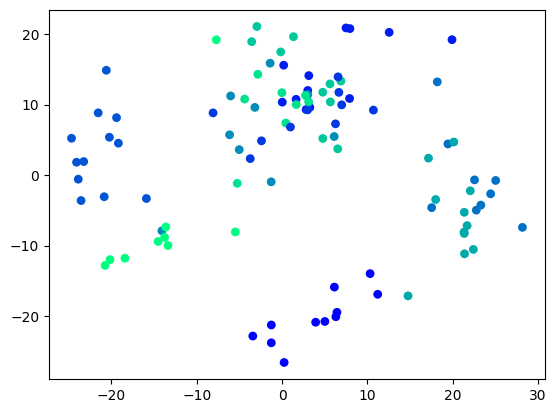

In [107]:
plt.scatter(X_transformed[:101, 0], X_transformed[:101, 1], c=y[:101], edgecolor='none', s=40,cmap='winter')

Если представить, что отклики нам неизвестны, то картина становится гораздо менее радужной. Объединение объектов в группы интуитивно, конечно, возможно, но с существенными оговорками.

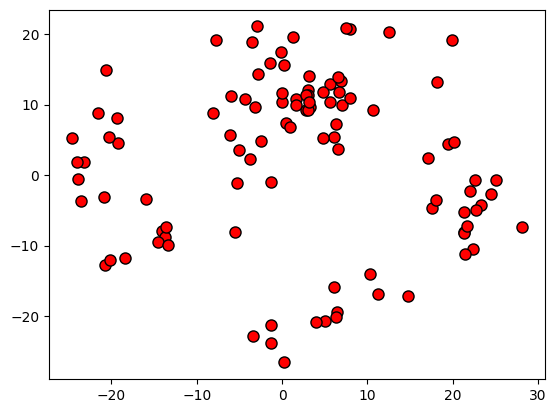

In [108]:
plt.plot(X_transformed[:101, 0], X_transformed[:101, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

Для дальнейшего анализа нам удобно будет построить не 2, а все 64 ГК (хотя, конечно, это можно было сделать и сразу, а картинку строить лишь по первым двум).

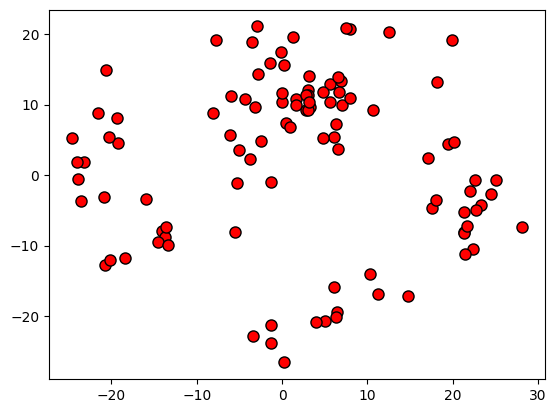

In [109]:
pca = PCA(n_components=64, svd_solver='full')
X_full = pca.fit(X).transform(X)
plt.clf()
plt.cla()
plt.plot(X_transformed[:101, 0], X_transformed[:101, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [110]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.149, 0.285, 0.403, 0.487, 0.545, 0.594, 0.637, 0.674, 0.707,
       0.738, 0.762, 0.785, 0.803, 0.821, 0.835, 0.849, 0.863, 0.875,
       0.885, 0.894, 0.903, 0.911, 0.919, 0.926, 0.933, 0.939, 0.945,
       0.95 , 0.955, 0.959, 0.963, 0.966, 0.97 , 0.973, 0.976, 0.979,
       0.982, 0.984, 0.986, 0.988, 0.99 , 0.992, 0.993, 0.995, 0.996,
       0.997, 0.998, 0.999, 0.999, 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

Построим график зависимости доли объясненной дисперсии от количества используемых ГК. Подробный описание произведено в лекции.

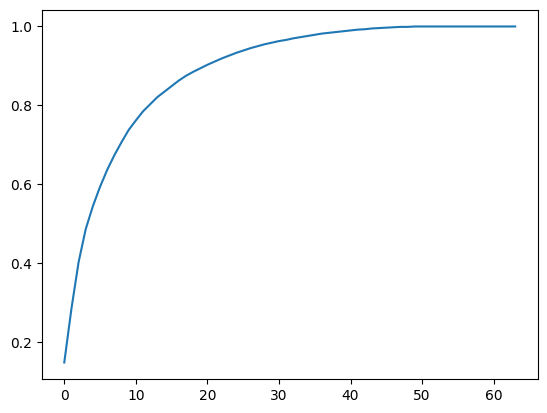

In [111]:
plt.plot(np.arange(64), explained_variance, ls = '-')